In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import copy
import matplotlib.ticker as ticker
import time

# Algorithm

from Adagrad import Adagrad
from SGD import SGD
from OMD import OMD
from SEG import SEG
from SERG import SERG
from batch_GD import batch_GD
from ONewton_step import ONS
from Mini_batch import Mini_batch

# Data importation and preparation

- Exécutez la cellule ci dessous pour charger et préparer les données MNIST

In [2]:
test = np.genfromtxt('MNIST/mnist_test.csv', delimiter=',')
train = np.genfromtxt('MNIST/mnist_train.csv', delimiter=',')
print(f"test shape : {test.shape} \ntrain shape : {train.shape}")

# normalisation

test_data, test_labels = test[:,1:]/255, test[:,0]
train_data, train_labels = train[:,1:]/255, train[:,0]
print(f"test data shape :{test_data.shape}")
print(f"test labels shape :{test_labels.shape}")
print(f"train data shape :{train_data.shape}")
print(f"train labels shape :{train_labels.shape}")

# classes proportions

train_prop, test_prop = np.zeros(10), np.zeros(10)
for i in range(10):
    test_prop[i] = len(np.where(test_labels == i)[0])
    train_prop[i] = len(np.where(train_labels == i)[0])
print("\ntrain classes proportions :")
print(train_prop/train_prop.sum(0))
print("-"*25)
print("test classes proportions :")
print(test_prop/test_prop.sum(0))

# 0 vs others

zeros_test = np.where(test_labels == 0)[0]
non_zeros_test = np.where(test_labels != 0)[0]
zeros_train = np.where(train_labels == 0)[0]
non_zeros_train = np.where(train_labels != 0)[0]
test_labels[zeros_test], test_labels[non_zeros_test] = 1, -1
train_labels[zeros_train], train_labels[non_zeros_train] = 1, -1


# Vector preparation

np.random.seed(1) # fix seed
dim = test_data.shape[1] + 1
alpha = 0
radius = 10
epoch = 100

accuracy_train, accuracy_test, loss_train, loss_test = [], [], [], []

train_A = np.column_stack((train_data,np.ones(train_data.shape[0])))
test_A = np.column_stack((test_data,np.ones(test_data.shape[0])))

train_B = train_labels
test_B = test_labels

test shape : (10000, 785) 
train shape : (60000, 785)
test data shape :(10000, 784)
test labels shape :(10000,)
train data shape :(60000, 784)
train labels shape :(60000,)

train classes proportions :
[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]
-------------------------
test classes proportions :
[0.098  0.1135 0.1032 0.101  0.0982 0.0892 0.0958 0.1028 0.0974 0.1009]


# OCO Lecture's Algorithm Test

- Exécutez la cellule ci dessous en choissant les algorithmes et les hyperparamètres que vous voulez tester

--------------------
--------------------
Adagrad running
--------------------
--------------------
init : test loss 47.25, test acc 0.10
-------------------------
epoch 100 : test loss 0.12, test acc 0.93
epoch 200 : test loss 0.12, test acc 0.94
epoch 300 : test loss 0.11, test acc 0.94
epoch 400 : test loss 0.08, test acc 0.96
epoch 500 : test loss 0.08, test acc 0.96
epoch 600 : test loss 0.07, test acc 0.96
epoch 700 : test loss 0.07, test acc 0.96
epoch 800 : test loss 0.07, test acc 0.96
epoch 900 : test loss 0.07, test acc 0.96
epoch 1000 : test loss 0.06, test acc 0.96
epoch 1100 : test loss 0.06, test acc 0.96
epoch 1200 : test loss 0.06, test acc 0.96
epoch 1300 : test loss 0.06, test acc 0.97
epoch 1400 : test loss 0.07, test acc 0.97
epoch 1500 : test loss 0.06, test acc 0.96
epoch 1600 : test loss 0.06, test acc 0.96
epoch 1700 : test loss 0.06, test acc 0.96
epoch 1800 : test loss 0.06, test acc 0.97
epoch 1900 : test loss 0.06, test acc 0.97
epoch 2000 : test loss 0.06,

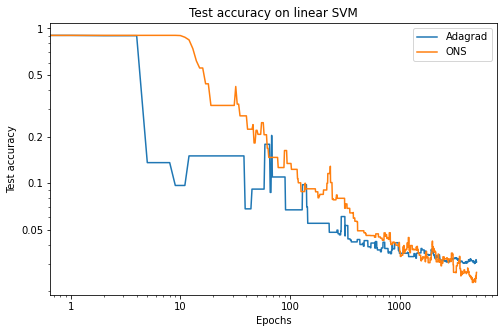

In [13]:
algos = []
accuracy_list = []
compute_times = []


#######################################################
#######################################################

# Choose your algorithm amongs : SGD, OMD, SEG, ONS, ...

#######################################################
#######################################################

#algo1 = SGD(proj = True) ; algos.append(algo1)
#algo2 = SGD(proj = False) ; algos.append(algo2)
algo3 = Adagrad() ; algos.append(algo3)
algo4 = ONS() ; algos.append(algo4)
#algo5 = SEG() ; algos.append(algo5)
#algo6 = SERG() ; algos.append(algo6)
#algo7 = OMD() ; algos.append(algo7)

#################################
# Choose your hyperparameters
################################

epoch = 5000
L1_radius = 100


# Init hyperplan
X = np.random.rand(dim)

for a in algos:
    print("-"*20)
    print("-"*20)
    print(f"{a.title} running")
    print("-"*20)
    print("-"*20)
    accuracy ,time = a.train(epoch, L1_radius, copy.deepcopy(X), train_A, test_A, train_B, test_B)
    accuracy_list.append(accuracy)
    compute_times.append(time)

fig, ax = plt.subplots(1,1, figsize=(8,5))
for i in range(len(algos)):
    ax.plot(1 - np.array(accuracy_list[i]), label=f"{algos[i].title}")
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlabel='Epochs',ylabel='Test accuracy')
ax.set_title(f"Test accuracy on linear SVM")
ax.set_yticks([0.05,0.10,0.20,0.5,1])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

plt.legend()
plt.show()

## Plot training time

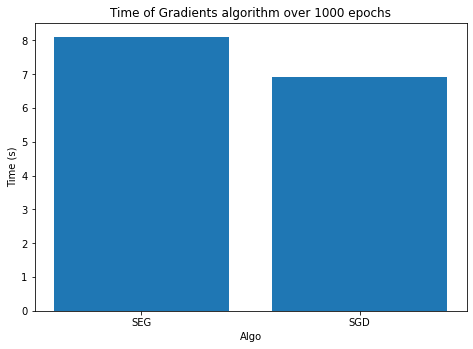

In [15]:
fig = plt.figure(figsize=(6,4))
bx = fig.add_axes([0,0,1,1])
bx.set_title(f"Time of Gradients algorithm over {epoch} epochs")
bx.set(xlabel='Algo',ylabel='Time (s)')
titles = [a.title for a in algos]
bx.bar(titles,compute_times)
plt.show()

# Research article Algorithm Test : Efficient Mini Batch Training

- Exécutez la cellule ci dessous en choissant les algorithmes et les hyperparamètres que vous voulez tester

--------------------
--------------------
Mini_batch_proj50 running
--------------------
--------------------
init : test loss 45.63, test acc 0.10
-------------------------
epoch 10 : test loss 0.21, test acc 0.93
epoch 20 : test loss 0.14, test acc 0.93
epoch 30 : test loss 0.13, test acc 0.94
epoch 40 : test loss 0.10, test acc 0.94
epoch 50 : test loss 0.09, test acc 0.94
epoch 60 : test loss 0.09, test acc 0.94
epoch 70 : test loss 0.08, test acc 0.94
epoch 80 : test loss 0.08, test acc 0.95
epoch 90 : test loss 0.07, test acc 0.95
epoch 100 : test loss 0.07, test acc 0.95
-------------------------
final : test loss 0.07, test acc 0.95
--------------------
--------------------
Mini_batch_proj100 running
--------------------
--------------------
init : test loss 45.63, test acc 0.10
-------------------------
epoch 10 : test loss 0.16, test acc 0.92
epoch 20 : test loss 0.11, test acc 0.93
epoch 30 : test loss 0.09, test acc 0.94
epoch 40 : test loss 0.08, test acc 0.95
epoch 50 : t

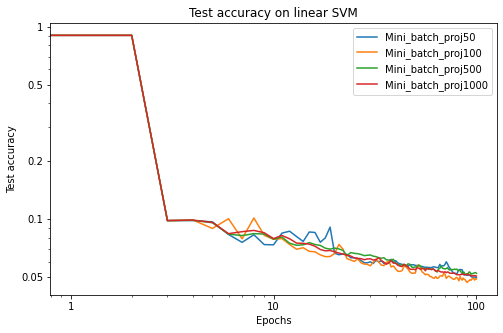

In [11]:
accuracy_list_mini_b = []
compute_times_mini_b = []
mini_batches_algos = []

########################################################
# Choose the mini batche sizes and other hyperparameters
########################################################

mini_batche_sizes = [50, 100, 500, 1000]
L1_ball_proj = [True,True,True,True]
epoch = 100
L1_radius = 100


# Init hyperplan
X = np.random.rand(dim)

for (b,p) in zip(mini_batche_sizes,L1_ball_proj):
    a = Mini_batch(batch_size=b, proj=p) ; mini_batches_algos.append(a)
    print("-"*20)
    print("-"*20)
    print(f"{a.title} running")
    print("-"*20)
    print("-"*20)
    accuracy ,time = a.train(epoch, L1_radius, copy.deepcopy(X), train_A, test_A, train_B, test_B)
    accuracy_list_mini_b.append(accuracy)
    compute_times_mini_b.append(time)

fig, ax = plt.subplots(1,1, figsize=(8,5))
for i in range(len(mini_batche_sizes)):
    ax.plot(1 - np.array(accuracy_list_mini_b[i]), label=f"{mini_batches_algos[i].title}")
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlabel='Epochs',ylabel='Test accuracy')
ax.set_title(f"Test accuracy on linear SVM")
ax.set_yticks([0.05,0.10,0.20,0.5,1])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

plt.legend()
plt.show()

## Plot training time

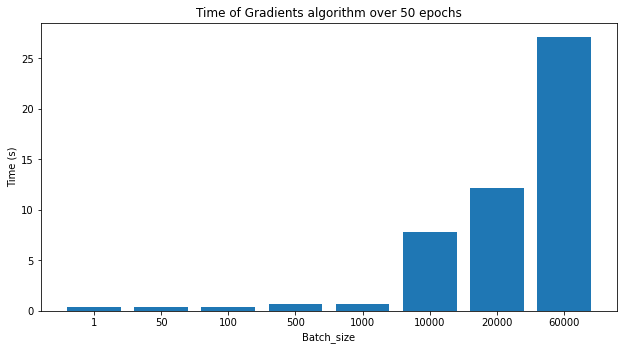

In [10]:
fig = plt.figure(figsize=(8,4))
bx = fig.add_axes([0,0,1,1])
bx.set_title(f"Time of Gradients algorithm over {epoch} epochs")
bx.set(xlabel='Batch_size',ylabel='Time (s)')
titles_mb = [str(s) for s in mini_batche_sizes]
bx.bar(titles_mb,compute_times_mini_b)
plt.show()